In [80]:
import os
import re
import numpy as np
import scipy.spatial
from matplotlib import pylab as plt

%matplotlib inline

# First exercise

Read data and do tokenization

In [34]:
with open('sentences.txt', 'r', encoding='utf-8') as fp:
    lines = [l.lower() for l in fp.readlines()]

In [40]:
token_re = r'[^a-z]'
sentence_words = []
for sentence in lines:
    # Split
    new = re.split(token_re, sentence)
    # Remove empty
    sentence_words.append([w for w in new if w])
    

Get map from a word to its unique index

In [52]:
words = {w for sentence in sentence_words for w in sentence}
fixed = list(words)
word_map = {fixed[i]: i for i in range(len(words))}

Prepare main matrix

In [56]:
mtrx = np.array([[sentence.count(word) for word in fixed] for sentence in sentence_words])

In [64]:
cos_distances = [scipy.spatial.distance.cosine(mtrx[0], vector) for vector in mtrx]

In [66]:
distances = sorted(cos_distances)

In [69]:
indexes = [cos_distances.index(v) for v in distances]
print (f"Minimum indexes {str(indexes)}")

Minimum indexes [0, 6, 4, 21, 10, 12, 16, 20, 2, 13, 14, 11, 8, 19, 3, 9, 7, 5, 15, 15, 1, 17]


Save results

In [70]:
with open('solution.txt', 'w', encoding='utf-8') as fp:
    fp.write(f'{str(indexes[1])} {str(indexes[2])}')

# Second exercise

In [75]:
def myf(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

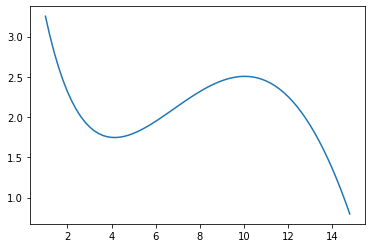

In [85]:
xs = np.arange(1, 15, 0.2)
fs = [myf(x) for x in xs]
plt.plot(xs, fs)
plt.show()

## First approximaion

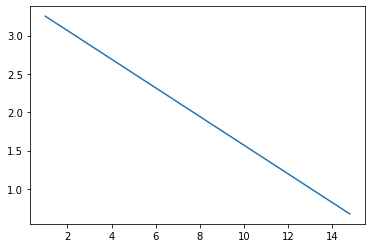

In [108]:
A1 = np.array([[1, 1], [1, 15]])
b1 = [myf(1), myf(15)]
sol1 = scipy.linalg.solve(A1, b1)
y1 = [np.polyval(np.flip(sol1), x) for x in xs]
plt.plot(xs, y1)
plt.show()

## Second approximaion

Solution:  [ 3.32512949 -0.06531159 -0.00760104]
Value 8: 2.316170159053224
Polinom 8: 2.316170159053224


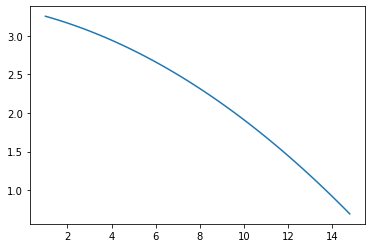

In [107]:
A2 = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]])
b2 = [myf(1), myf(8), myf(15)]
sol2 = scipy.linalg.solve(A2, b2)
print("Solution: ", sol2)
y2 = [np.polyval(np.flip(sol2), x) for x in xs]
print("Value 8:", sol2[0] + sol2[1] * 8 + sol2[2]*64)
print("Polinom 8:", np.polyval(np.flip(sol2), 8))
plt.plot(xs, y2)
plt.show()

## Third approximaion

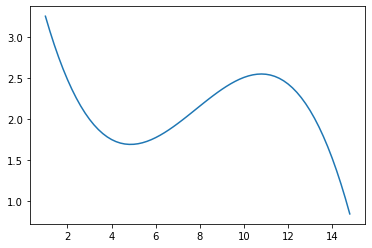

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
[4.36, -1.3, 0.19, -0.01]


In [113]:
A3 = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
b3 = [myf(1), myf(4), myf(10), myf(15)]
sol3 = scipy.linalg.solve(A3, b3)
y3 = [np.polyval(np.flip(sol3), x) for x in xs]
plt.plot(xs, y3)
plt.show()
print(sol3)
print([round(x, 2) for x in sol3])

In [116]:
with open('solution2.txt', 'w', encoding='utf-8') as fp:
    fp.write(' '.join([str(round(x, 2)) for x in sol3]))